# Movie Dataset Insights and Visualizations
In this notebook, we will extract meaningful insights and create visualizations from the movie dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = 'IMDB.csv'  # <-- update this with your file location
df = pd.read_csv(file_path)

# Check the first few rows of the dataset
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,tagline,production_companies,production_countries,spoken_languages,keywords,release_year,Director,Certificate,IMDB_Rating,genres_list
0,278,The Shawshank Redemption,8.702,24649,Released,23-09-1994,28341469,142,False,25000000,...,Fear can hold you prisoner. Hope can set you f...,Castle Rock Entertainment,United States of America,English,"['prison', 'friendship', 'police brutality', '...",1994.0,Frank Darabont,A,9.3,"['Drama', 'Crime']"
1,238,The Godfather,8.707,18677,Released,14-03-1972,245066411,175,False,6000000,...,An offer you can't refuse.,"Paramount, Alfran Productions",United States of America,"English, Italian, Latin","['based on novel or book', 'loss of loved one'...",1972.0,Francis Ford Coppola,A,9.2,"['Drama', 'Crime']"
2,566579,We Don't Live Here Anymore,4.000,1,Released,14-10-2018,0,110,False,0,...,NaN,Sunbow Productions,Nigeria,English,[],2018.0,Francis Ford Coppola,NaN,NaN,['Drama']
3,155,The Dark Knight,8.512,30619,Released,16-07-2008,1004558444,152,False,185000000,...,Welcome to a world without rules.,"DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","['joker', 'sadism', 'chaos', 'secret identity'...",2008.0,Christopher Nolan,UA,9.0,"['Drama', 'Action', 'Crime', 'Thriller']"
4,122,The Lord of the Rings: The Return of the King,8.474,22334,Released,01-12-2003,1118888979,201,False,94000000,...,The eye of the enemy is moving.,"New Line Cinema, WingNut Films, The Saul Zaent...","New Zealand, United States of America",English,"['based on novel or book', 'orcs', 'elves', 'd...",2003.0,Peter Jackson,U,8.9,"['Adventure', 'Fantasy', 'Action']"


## Data Cleaning and Preparation
We will first inspect and clean the data before proceeding with any visualizations.

In [2]:
# Checking for missing values
df.isnull().sum()

# Drop or fill missing values as needed
df.dropna(inplace=True)  # Or you can use fillna() as appropriate

In [13]:
df.isnull()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,tagline,production_companies,production_countries,spoken_languages,keywords,release_year,Director,Certificate,IMDB_Rating,genres_list
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042343,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1043776,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1044849,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1047475,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df.dropna

<bound method DataFrame.dropna of              id                                          title  vote_average  \
0           278                       The Shawshank Redemption         8.702   
1           238                                  The Godfather         8.707   
3           155                                The Dark Knight         8.512   
4           122  The Lord of the Rings: The Return of the King         8.474   
5        429617                      Spider-Man: Far From Home         7.447   
...         ...                                            ...           ...   
1042343  759620                                            Gag         0.000   
1043776  748806                                       Brothers         0.000   
1044849  744760                                      The Twins         0.000   
1047475  750327                                           Anak         0.000   
1048455  750512                                   Maria's Tale         0.000   

     

In [15]:
df.dropna(how="all")

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,tagline,production_companies,production_countries,spoken_languages,keywords,release_year,Director,Certificate,IMDB_Rating,genres_list
0,278,The Shawshank Redemption,8.702,24649,Released,23-09-1994,28341469,142,False,25000000,...,Fear can hold you prisoner. Hope can set you f...,Castle Rock Entertainment,United States of America,English,"['prison', 'friendship', 'police brutality', '...",1994.0,Frank Darabont,A,9.3,"[Drama, Crime]"
1,238,The Godfather,8.707,18677,Released,14-03-1972,245066411,175,False,6000000,...,An offer you can't refuse.,"Paramount, Alfran Productions",United States of America,"English, Italian, Latin","['based on novel or book', 'loss of loved one'...",1972.0,Francis Ford Coppola,A,9.2,"[Drama, Crime]"
3,155,The Dark Knight,8.512,30619,Released,16-07-2008,1004558444,152,False,185000000,...,Welcome to a world without rules.,"DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","['joker', 'sadism', 'chaos', 'secret identity'...",2008.0,Christopher Nolan,UA,9.0,"[Drama, Action, Crime, Thriller]"
4,122,The Lord of the Rings: The Return of the King,8.474,22334,Released,01-12-2003,1118888979,201,False,94000000,...,The eye of the enemy is moving.,"New Line Cinema, WingNut Films, The Saul Zaent...","New Zealand, United States of America",English,"['based on novel or book', 'orcs', 'elves', 'd...",2003.0,Peter Jackson,U,8.9,"[Adventure, Fantasy, Action]"
5,429617,Spider-Man: Far From Home,7.447,14495,Released,28-06-2019,1131927996,129,False,160000000,...,It’s time to step up.,"Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,"Czech, Dutch, English, German, Italian","['venice', 'italy', 'superhero', 'school trip'...",2019.0,Steven Spielberg,PG-13,6.7,"[Action, Adventure, Science Fiction]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042343,759620,Gag,0.000,0,Released,01-01-2020,0,108,True,0,...,"Non-Stop, Deep Throat Action!",Dragon Media Corporation,United States of America,English,['gay pornography'],2020.0,M. Night Shyamalan,PG-13,7.3,[Unknown]
1043776,748806,Brothers,0.000,0,Released,24-08-2020,1,17,False,1,...,A Movie about Forgetting.,Love Streams Productions,United States of America,English,"['brother', 'shower', 'film in film', 'family ...",2020.0,Ali Abbasi,R,7.0,[Drama]
1044849,744760,The Twins,0.000,0,Released,24-09-2020,0,7,False,0,...,The greatest love endures the greatest sacrifice.,"WKNDPRJCTS, Daikin Malaysia",Malaysia,Mandarin,[],2020.0,Billy Ray,PG-13,7.0,[Drama]
1047475,750327,Anak,0.000,0,Released,30-07-1982,0,126,False,0,...,Are you to blame for what your daughter has be...,Regal Entertainment Inc.,Philippines,Tagalog,[],1982.0,Bob Swaim,R,6.1,[Drama]


## Visualization 1: Distribution of Movie Ratings
We will now create a histogram to show the distribution of IMDb ratings across the movies.

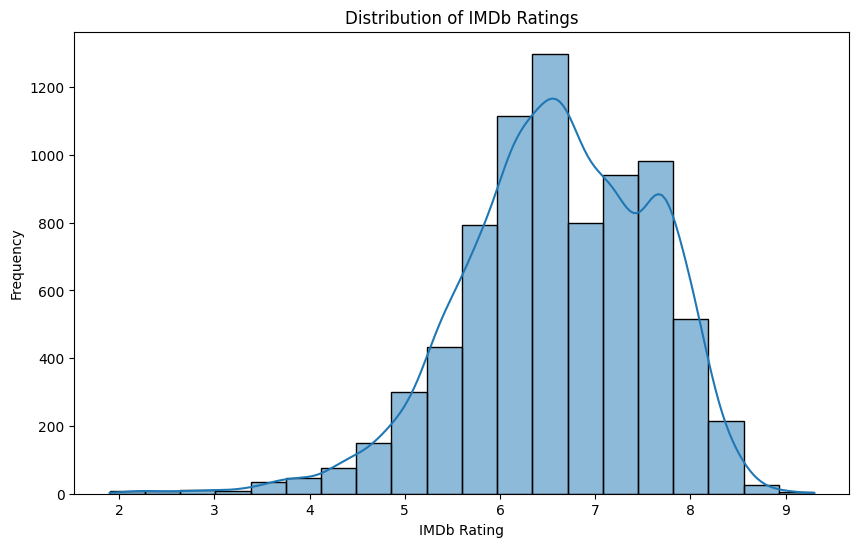

In [16]:
# Plotting the distribution of IMDb ratings
plt.figure(figsize=(10,6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

## Visualization 2: Revenue vs Budget
We'll create a scatter plot to explore the relationship between revenue and budget.

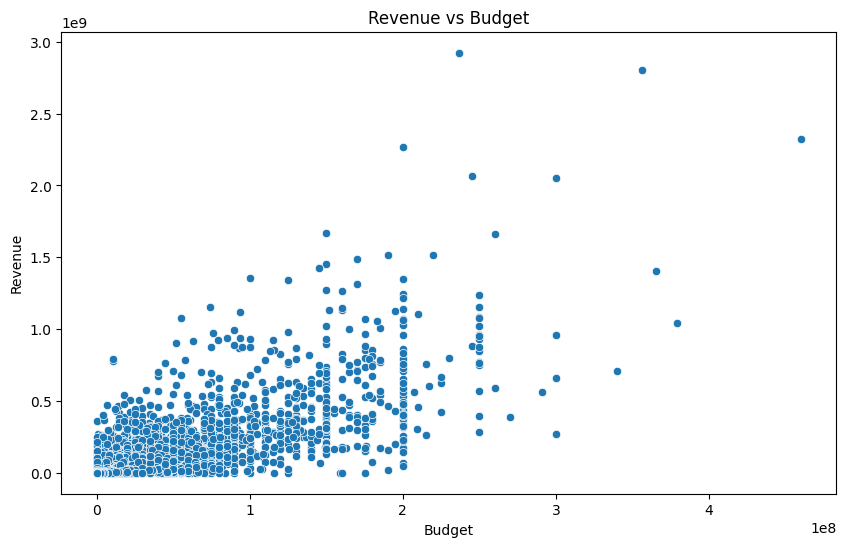

In [17]:
# Scatter plot for Revenue vs Budget
plt.figure(figsize=(10,6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Revenue vs Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

## Visualization 3: Genre Popularity
Let's examine the popularity of different genres based on their average vote count.

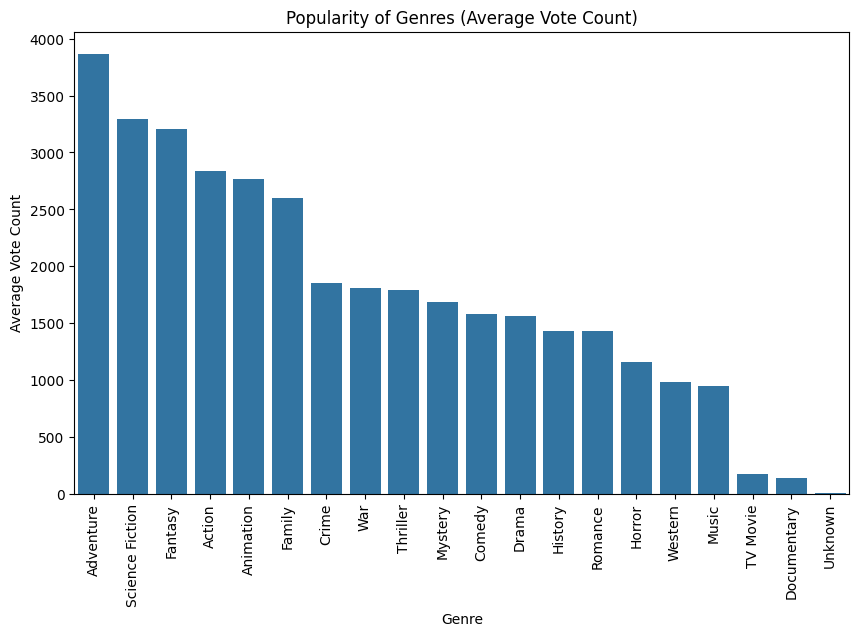

In [21]:
# Safely applying eval only to string values
df['genres_list'] = df['genres_list'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Exploding the genres list into individual rows for analysis
genres = df.explode('genres_list')

# Calculating the popularity of genres based on average vote count
genre_popularity = genres.groupby('genres_list')['vote_count'].mean().sort_values(ascending=False)

# Plotting the genre popularity
plt.figure(figsize=(10,6))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values)
plt.title('Popularity of Genres (Average Vote Count)')
plt.xlabel('Genre')
plt.ylabel('Average Vote Count')
plt.xticks(rotation=90)
plt.show()

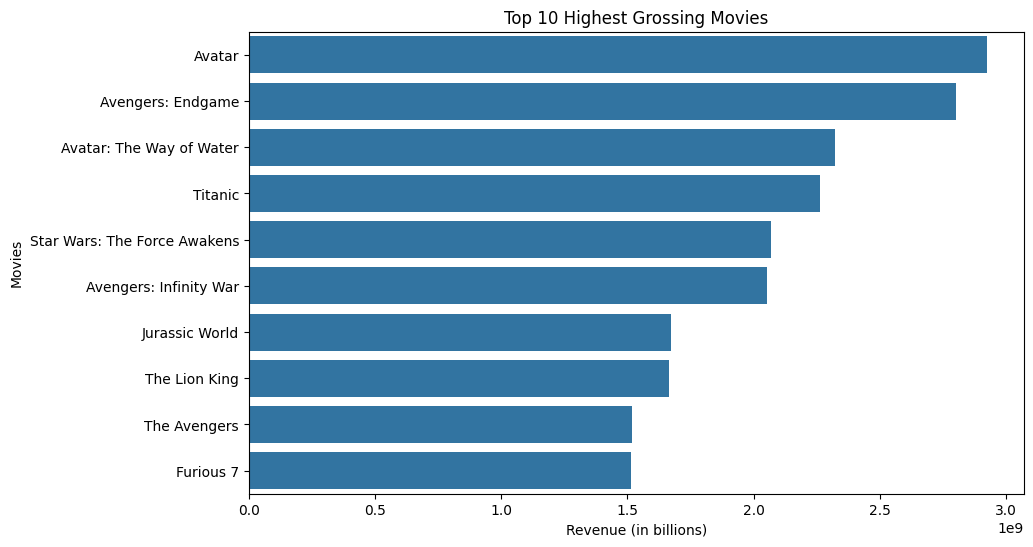

In [19]:
# Top 10 Highest Grossing Movies
top_grossing = df[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='revenue', y='title', data=top_grossing)
plt.title('Top 10 Highest Grossing Movies')
plt.xlabel('Revenue (in billions)')
plt.ylabel('Movies')
plt.show()


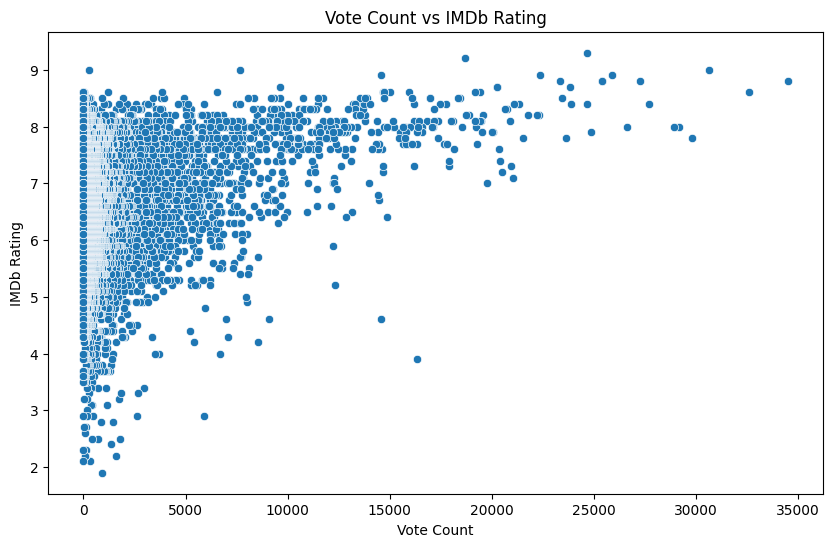

In [7]:
# Scatter plot of Vote Count vs IMDb Rating
plt.figure(figsize=(10,6))
sns.scatterplot(x='vote_count', y='IMDB_Rating', data=df)
plt.title('Vote Count vs IMDb Rating')
plt.xlabel('Vote Count')
plt.ylabel('IMDb Rating')
plt.show()


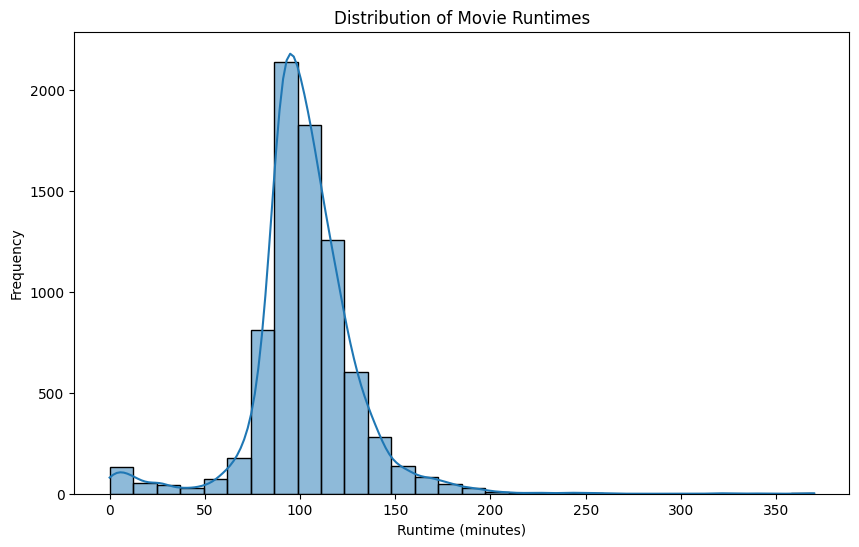

In [8]:
# Distribution of Movie Runtimes
plt.figure(figsize=(10,6))
sns.histplot(df['runtime'], bins=30, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()


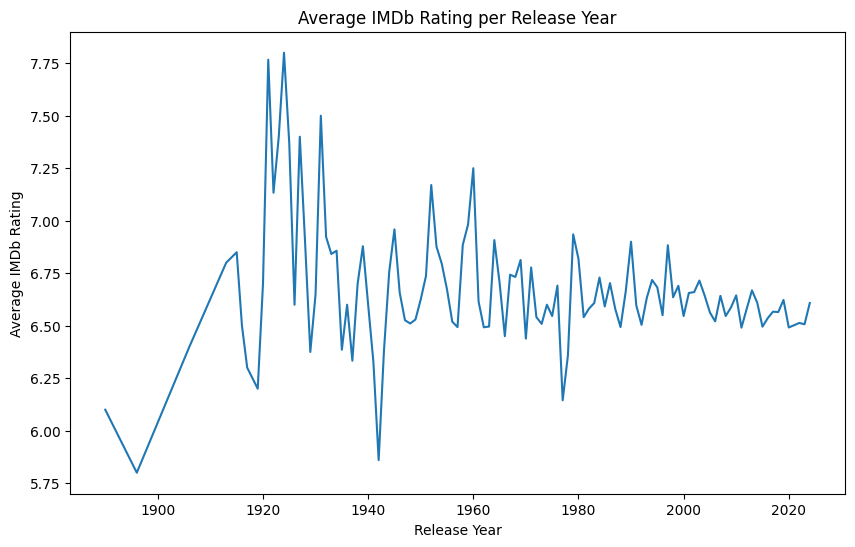

In [9]:
# Average IMDb Rating per Release Year
avg_rating_per_year = df.groupby('release_year')['IMDB_Rating'].mean()
plt.figure(figsize=(10,6))
avg_rating_per_year.plot()
plt.title('Average IMDb Rating per Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Rating')
plt.show()


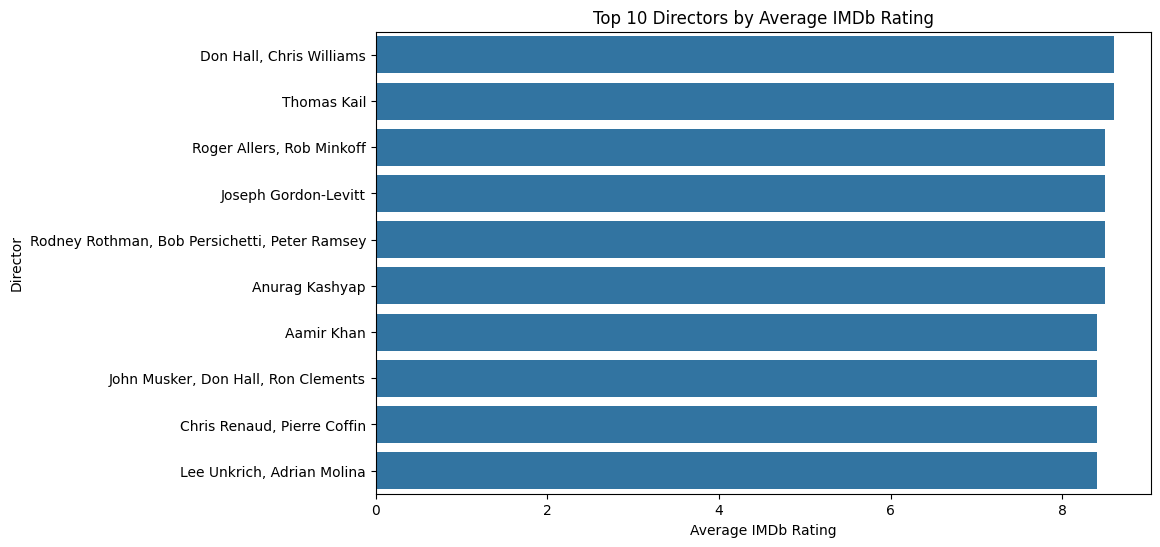

In [10]:
# Top 10 Directors by Average IMDb Rating
top_directors = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors by Average IMDb Rating')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Director')
plt.show()


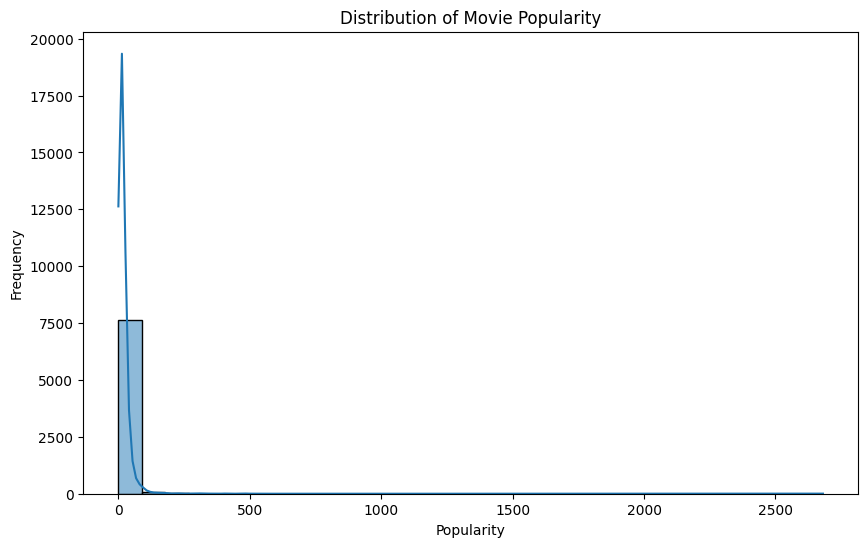

In [11]:
# Distribution of Movie Popularity
plt.figure(figsize=(10,6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


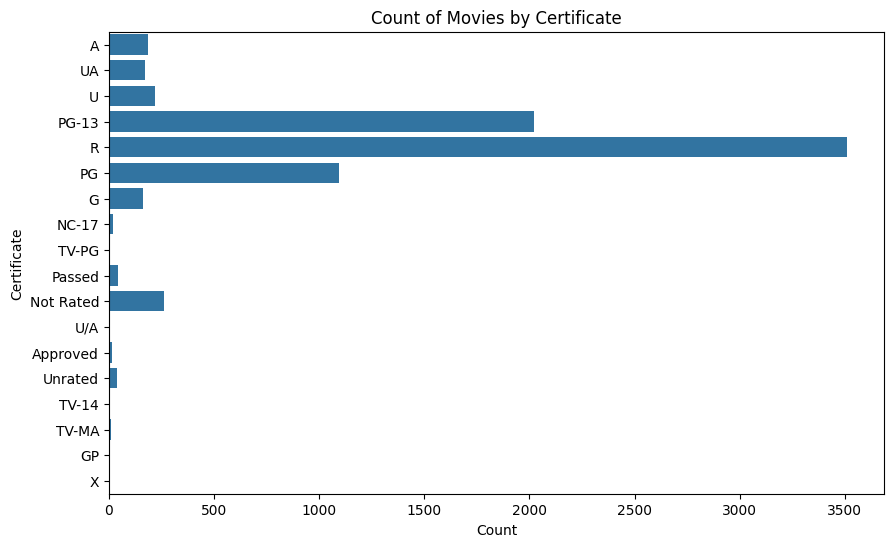

In [12]:
# Count of Movies by Certificate
plt.figure(figsize=(10,6))
sns.countplot(y='Certificate', data=df)
plt.title('Count of Movies by Certificate')
plt.xlabel('Count')
plt.ylabel('Certificate')
plt.show()


## Conclusion
In this notebook, we have explored the movie dataset and created several visualizations that help to uncover insights such as the distribution of movie ratings, the relationship between revenue and budget, and the popularity of different genres.